# PREPARACIÓN EDA

 1. Eliminar las columnas innecesarias.
 2. Escoger las partidas aduaneras relevantes para el estudio.
 3. La columna fecha debe dividirse en año y mes.

In [2]:
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt #Hacer gráficos
import seaborn as sns 
import pandas_profiling as ppr 
from fitter import Fitter 

In [3]:
%matplotlib inline

In [4]:
df_imp = pd.read_excel('Imp_m&m.xlsx')

In [5]:
# Composición inicial de la matriz
df_imp.shape

(367, 56)

In [6]:
# Eliminamos las columnas innecesarias para el estudio.
df_columnas_eliminadas =(df_imp.drop(['DUA','Aduana', 'ETA', 'Manifiesto Nr.', 'Embarcador / Exportador', 'Qty 1', 'Und 1', 'Qty 2', 'Und 2', 'U$ Flete Tot', 'U$ CFR Tot', 'U$ Seguro Tot', 'Fecha Embarque', 'U$ CIF Tot', 'U$ FOB Und 1', 'U$ CFR Und 1', 'AntiDumping', 'U$ CIF Und 1', 'U$ (CIF + Imp) Und 1', 'Cod. Tributario','U$ FOB Und 2','U$ CFR Und 2','Pais de Compra', 'Estado', 'Banco', 'Descripcion5', 'ISC', 'Descripcion1', 'Descripcion2', 'Descripcion4', 'Descripcion3', 'Agente Carga(Destino)', 'Agente Carga(Origen)', 'Naviera', 'Agencia de transporte', 'Derechos Espec.', 'Puerto de Embarque','U$ CIF Und 2', 'U$ (CIF + Imp) Und 2', 'Sobretasa',], axis=1))

In [7]:
# Conteo de cuantas veces se duplican las partidas aduaneras
filtro_duplicados = df_columnas_eliminadas['Partida Aduanera'].duplicated(keep=False)
df_columnas_eliminadas[filtro_duplicados]['Partida Aduanera'].value_counts()

1806900000    202
2105009000     31
6302320000     24
3304990000     24
9404900000     12
6302220000      9
3303000000      7
6403999000      7
1704909000      7
8481808000      6
8512201000      4
9018320000      4
1806320000      3
3305900000      3
1806310000      3
8481809900      3
6210100000      2
7318160000      2
7318230000      2
8481200090      2
Name: Partida Aduanera, dtype: int64

Elegimos estas tres partidas arancelarias porque estan relacionadas directamente con el  producto que vamos analizar ejemplo partida 8481200090 'REACTORES NUCLEARES, CALDERAS, MÁQUINAS, APARATOS Y ARTEFACTOS MECÁNICOS; PARTES DE ESTAS MÁQUINAS O APARATOS'; esta partida se elimina porque no esta relacionada con la importación de chocolates.

In [8]:
# Se trabajará con 3 partidas aduaneras
filtro_partidas_aduaneras = df_columnas_eliminadas['Partida Aduanera'].isin ([1806900000,1704909000,1806320000])
df_filtro_partidas = df_columnas_eliminadas[filtro_partidas_aduaneras]

In [9]:
df_filtro_partidas.shape

(212, 16)

In [10]:
df_filtro_partidas['Año'] = df_filtro_partidas['Fecha'].dt.year
df_filtro_partidas['Mes'] = df_filtro_partidas['Fecha'].dt.month
df_filtro_partidas.head(2)

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_9448\1126009531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_partidas['Año'] = df_filtro_partidas['Fecha'].dt.year
C:\Users\Beatriz\AppData\Local\Temp\ipykernel_9448\1126009531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_partidas['Mes'] = df_filtro_partidas['Fecha'].dt.month


,Partida Aduanera,Descripcion de la Partida Aduanera,Fecha,Importador,Kg Bruto,Kg Neto,U$ FOB Tot,Pais de Origen,Via,Agente de Aduana,Almacen,Descripcion Comercial,Ad Valorem,IGV,IPM,Canal,Año,Mes
0,1704909000,CHOCOLATE BLANCO Y DEMAS ARTICULOS DE CONFITER...,2021-03-31,ROYAL BRANDING PERU S.A.C.,302.62,291.82,375.0,ESTADOS UNIDOS,MARÍTIMO,CMC LOGISTIC´S S.A.C.,VILLAS OQUENDO S.A.,"M&M CHOCOLATE,M&M´S,S/M, REGISTRO SANITARIO:G6...",24.43,69.04,8.63,VERDE,2021,3
1,1704909000,CHOCOLATE BLANCO Y DEMAS ARTICULOS DE CONFITER...,2021-04-06,ROYAL BRANDING PERU S.A.C.,623.59,610.17,900.0,ESTADOS UNIDOS,MARÍTIMO,CMC LOGISTIC´S S.A.C.,NEPTUNIA S.A.,"M&M CHOCOLATE SINGLES,M&M´S,S/M, REGISTRO SANI...",0.00,163.28,20.41,VERDE,2021,4


In [11]:
# Eliminamos la columna fecha y nos quedamos con esta última matriz.
df_final = (df_filtro_partidas.drop(['Fecha'], axis=1))
df_final.shape

(212, 17)

In [12]:
df_final.isnull().sum()

Partida Aduanera                      0
Descripcion de la Partida Aduanera    0
Importador                            0
Kg Bruto                              0
Kg Neto                               0
U$ FOB Tot                            0
Pais de Origen                        0
Via                                   0
Agente de Aduana                      0
Almacen                               0
Descripcion Comercial                 0
Ad Valorem                            0
IGV                                   0
IPM                                   0
Canal                                 0
Año                                   0
Mes                                   0
dtype: int64

# Fluctuación de las importaciones de chocolate en el 2021 POR MES 
* ¿Que mes se importo más?
* ¿Que mes se importo menos?
* ¿En cuanto se diferencía Enero 2021 vs Enero 2022?

In [13]:
df_final['mes_e'] = df_final['Mes']
df_final.columns


Index(['Partida Aduanera', 'Descripcion de la Partida Aduanera', 'Importador',
       'Kg Bruto', 'Kg Neto', 'U$ FOB Tot', 'Pais de Origen', 'Via',
       'Agente de Aduana', 'Almacen', 'Descripcion Comercial', 'Ad Valorem',
       'IGV', 'IPM', 'Canal', 'Año', 'Mes', 'mes_e'],
      dtype='object')

In [14]:
df_final['mes_e'].replace({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'}, inplace=True)
df_final.head(2)


,Partida Aduanera,Descripcion de la Partida Aduanera,Importador,Kg Bruto,Kg Neto,U$ FOB Tot,Pais de Origen,Via,Agente de Aduana,Almacen,Descripcion Comercial,Ad Valorem,IGV,IPM,Canal,Año,Mes,mes_e
0,1704909000,CHOCOLATE BLANCO Y DEMAS ARTICULOS DE CONFITER...,ROYAL BRANDING PERU S.A.C.,302.62,291.82,375.0,ESTADOS UNIDOS,MARÍTIMO,CMC LOGISTIC´S S.A.C.,VILLAS OQUENDO S.A.,"M&M CHOCOLATE,M&M´S,S/M, REGISTRO SANITARIO:G6...",24.43,69.04,8.63,VERDE,2021,3,Marzo
1,1704909000,CHOCOLATE BLANCO Y DEMAS ARTICULOS DE CONFITER...,ROYAL BRANDING PERU S.A.C.,623.59,610.17,900.0,ESTADOS UNIDOS,MARÍTIMO,CMC LOGISTIC´S S.A.C.,NEPTUNIA S.A.,"M&M CHOCOLATE SINGLES,M&M´S,S/M, REGISTRO SANI...",0.00,163.28,20.41,VERDE,2021,4,Abril


In [15]:
df_mes = df_final.groupby(['Mes','mes_e','Año']).agg({'U$ FOB Tot':'sum'})
df_mes

U$ FOB Tot
Mes mes_e      Año             
1   Enero      2021     2765.12
               2022   157809.12
2   Febrero    2021   263536.28
3   Marzo      2021    25220.54
4   Abril      2021   178798.67
5   Mayo       2021   104291.52
6   Junio      2021    70635.64
7   Julio      2021   168934.47
8   Agosto     2021   176873.42
9   Septiembre 2021   466407.63
10  Octubre    2021    65271.50
11  Noviembre  2021   333166.34
12  Diciembre  2021    32282.78

<AxesSubplot:title={'center':'FOB por Mes'}, xlabel='Mes,mes_e,Año'>

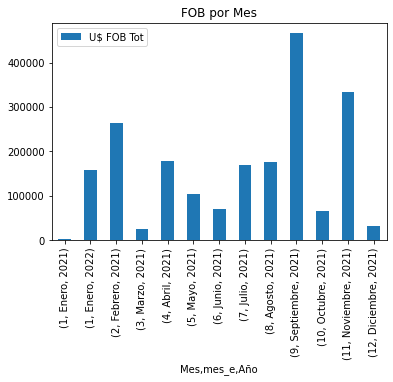

In [16]:
df_mes.plot(kind='bar', title = 'FOB por Mes')

In [17]:
df_time = df_final.groupby(['mes_e','Año']).agg({'U$ FOB Tot':'sum'})
df_imp_time = df_time.sort_values('U$ FOB Tot',ascending = False)
df_imp_time = df_imp_time.loc['Enero']

<AxesSubplot:title={'center':'Importacion por Enero 2021 vs 2022'}, xlabel='Año'>

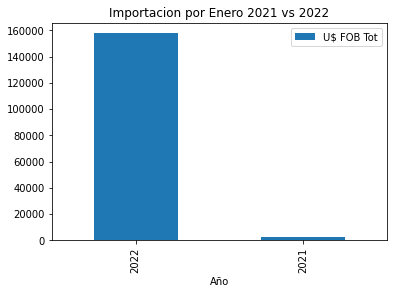

In [18]:
df_imp_time.plot(kind='bar', title = 'Importacion por Enero 2021 vs 2022')

Podemos observar una gran diferencia entres el mes de enero 2021 y 2022, se deduce que esto es debido a la pandemia, ya que este producto no es de vital de importancia en una crisis sanitaria. Ahora que se esta regulando todo, se puede observar la alta demanda en su importación. 

# Importadores que mas demanda tienen en el mercado respecto al FOB
* ¿Quien importa más este producto?
* ¿Quien importa menos?
* ¿De que pais se importa más?


In [19]:
df_importador = df_final.groupby('Importador').agg({'U$ FOB Tot':'sum'})
df_imp_fob = df_importador.sort_values('U$ FOB Tot',ascending = False)
print(df_imp_fob)

                                                    U$ FOB Tot
Importador                                                    
PERUFARMA                                           1658216.09
AXIONLOG PERU S.A.C.                                 284844.25
MASEF IMPORT S.A.C.                                   56731.44
TOP PARTNER S.A.C.                                    23129.00
ROYAL BRANDING PERU S.A.C.                             7875.00
KIMBAFA IMPORT EXPORT E.I.R.L.                         7193.53
MIKA INVERSIONES S.A.C.                        ...     6803.72
DISTRIBUIDORA ODET S.A.C.                              1200.00


<AxesSubplot:title={'center':'Importacion por FOB'}, ylabel='Importador'>

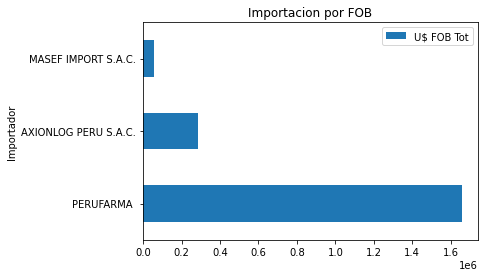

In [20]:
df_imp_fob.head(3).plot(kind='barh', title = 'Importacion por FOB')

In [21]:
df_pais = df_final.groupby(['Pais de Origen']).agg({'U$ FOB Tot':'sum'})
df_imp_pais = df_pais.sort_values('U$ FOB Tot',ascending = False)
print(df_imp_pais)

                U$ FOB Tot
Pais de Origen            
ESTADOS UNIDOS  2039207.49
CHINA              5585.54
POLONIA            1200.00


<AxesSubplot:title={'center':'Importacion por Pais'}, ylabel='Pais de Origen'>

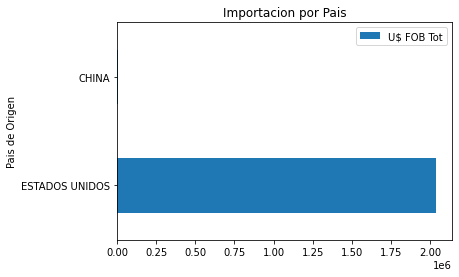

In [22]:
df_imp_pais.head(2).plot(kind='barh', title = 'Importacion por Pais')

# Canal frecuente en las importaciones de este producto
* ¿Que canal tiene mas importancia en este producto rojo, verde o naranja?
* ¿Que vía predomina en estos despachos?
* ¿Que agente de aduana tiene mayor relevancía en este producto?

In [23]:
df_canal = df_final.groupby(['Canal']).agg({'U$ FOB Tot':'sum'})
df_imp_canal = df_canal.sort_values('U$ FOB Tot',ascending = False)
print(df_imp_canal)

         U$ FOB Tot
Canal              
VERDE    1102553.34
ROJO      936246.16
NARANJA     7193.53


<AxesSubplot:title={'center':'Importacion por Canal'}, xlabel='Canal'>

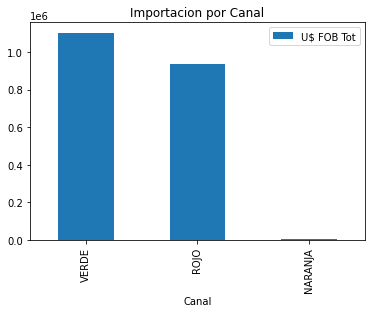

In [24]:
df_imp_canal.plot(kind='bar', title = 'Importacion por Canal')

In [25]:
df_via = df_final.groupby(['Via']).agg({'U$ FOB Tot':'sum'})
df_imp_via = df_via.sort_values('U$ FOB Tot',ascending = False)
print(df_imp_via)

          U$ FOB Tot
Via                 
MARÍTIMO  2045993.03


In [35]:
df_agente = df_final.groupby(['Agente de Aduana']).agg({'U$ FOB Tot':'sum'})
df_imp_agente = df_agente.sort_values('U$ FOB Tot',ascending = False)

In [36]:
df_agente.rename({'N/A 8458':'OTROS'}, axis=0)

,U$ FOB Tot
Agente de Aduana,
CMC LOGISTIC´S S.A.C.,7875.00
CRF ADUANAS S.A.C.,322136.78
GRUPO PML S.A.C AGENTES DE ADUANAS,26632.44
LIP ADUANAS S.A.,23129.00
MIASA INTEGRACION ADUANERA S.A.,1658216.09
MOL LOGISTIC S.A.C.,68.54
OTROS,6735.18
TLI ADUANAS S.A.C.,1200.00


<AxesSubplot:title={'center':'Importacion por Agente de Aduana'}, ylabel='Agente de Aduana'>

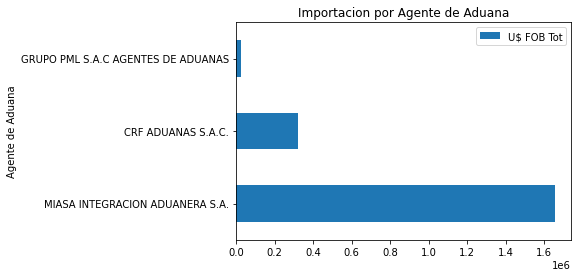

In [39]:
df_imp_agente.head(3).plot(kind='barh', title = 'Importacion por Agente de Aduana')

In [40]:
df_final.to_csv("Data limpia.csv")